<a href="https://colab.research.google.com/github/nishzsche/hr_data_analysis/blob/main/sequoia_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

> 1. Build a model to predict who are the employees who are at flight risk. 
2. Identify action items to solve for the top reasons which make the employees leave the organization.

In [ ]:
import pandas as pd
import numpy as np

## Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline


In [ ]:
file_path = "/content/drive/MyDrive/Sequoia_Data_Science_Case_Study_Dataset.xls"
sheet_name = 'SequoiaDataScientist_Dataset'

df = pd.read_excel(file_path, sheet_name = sheet_name)
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Does training time have an impact in Turnover?

In [ ]:
df['Turnover'] = df['Turnover'].map({'Yes':1,'No':0})

# EDA

In [ ]:
df.describe()

Age     Turnover    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

## Are there identifiers that can be dropped?

Answer: EmployeeNumber

In [ ]:
df.drop('EmployeeNumber', axis = 1, inplace = True)
df.shape

(1470, 34)

## How many attributes have just one unique value in them? i.e., STD = 0

Answer:

1. EmployeeCount
2. StandardHours
3. Over18

The above attributes can be dropped from the dataset

In [ ]:
non_unique_cols = ['EmployeeCount', 'StandardHours', 'Over18']

df.drop(non_unique_cols, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Turnover                  1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

## What are the different datatypes in the dataset and how many in each?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Turnover                  1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
pd.DataFrame(df.dtypes, columns=['Dtype']).Dtype.value_counts()

int64     24
object     7
Name: Dtype, dtype: int64

## What are the unique values in the categorical columns? And what is their distribution?

1. What is their share in the population?
2. Are there opportunities to clean them?
> Answer: No

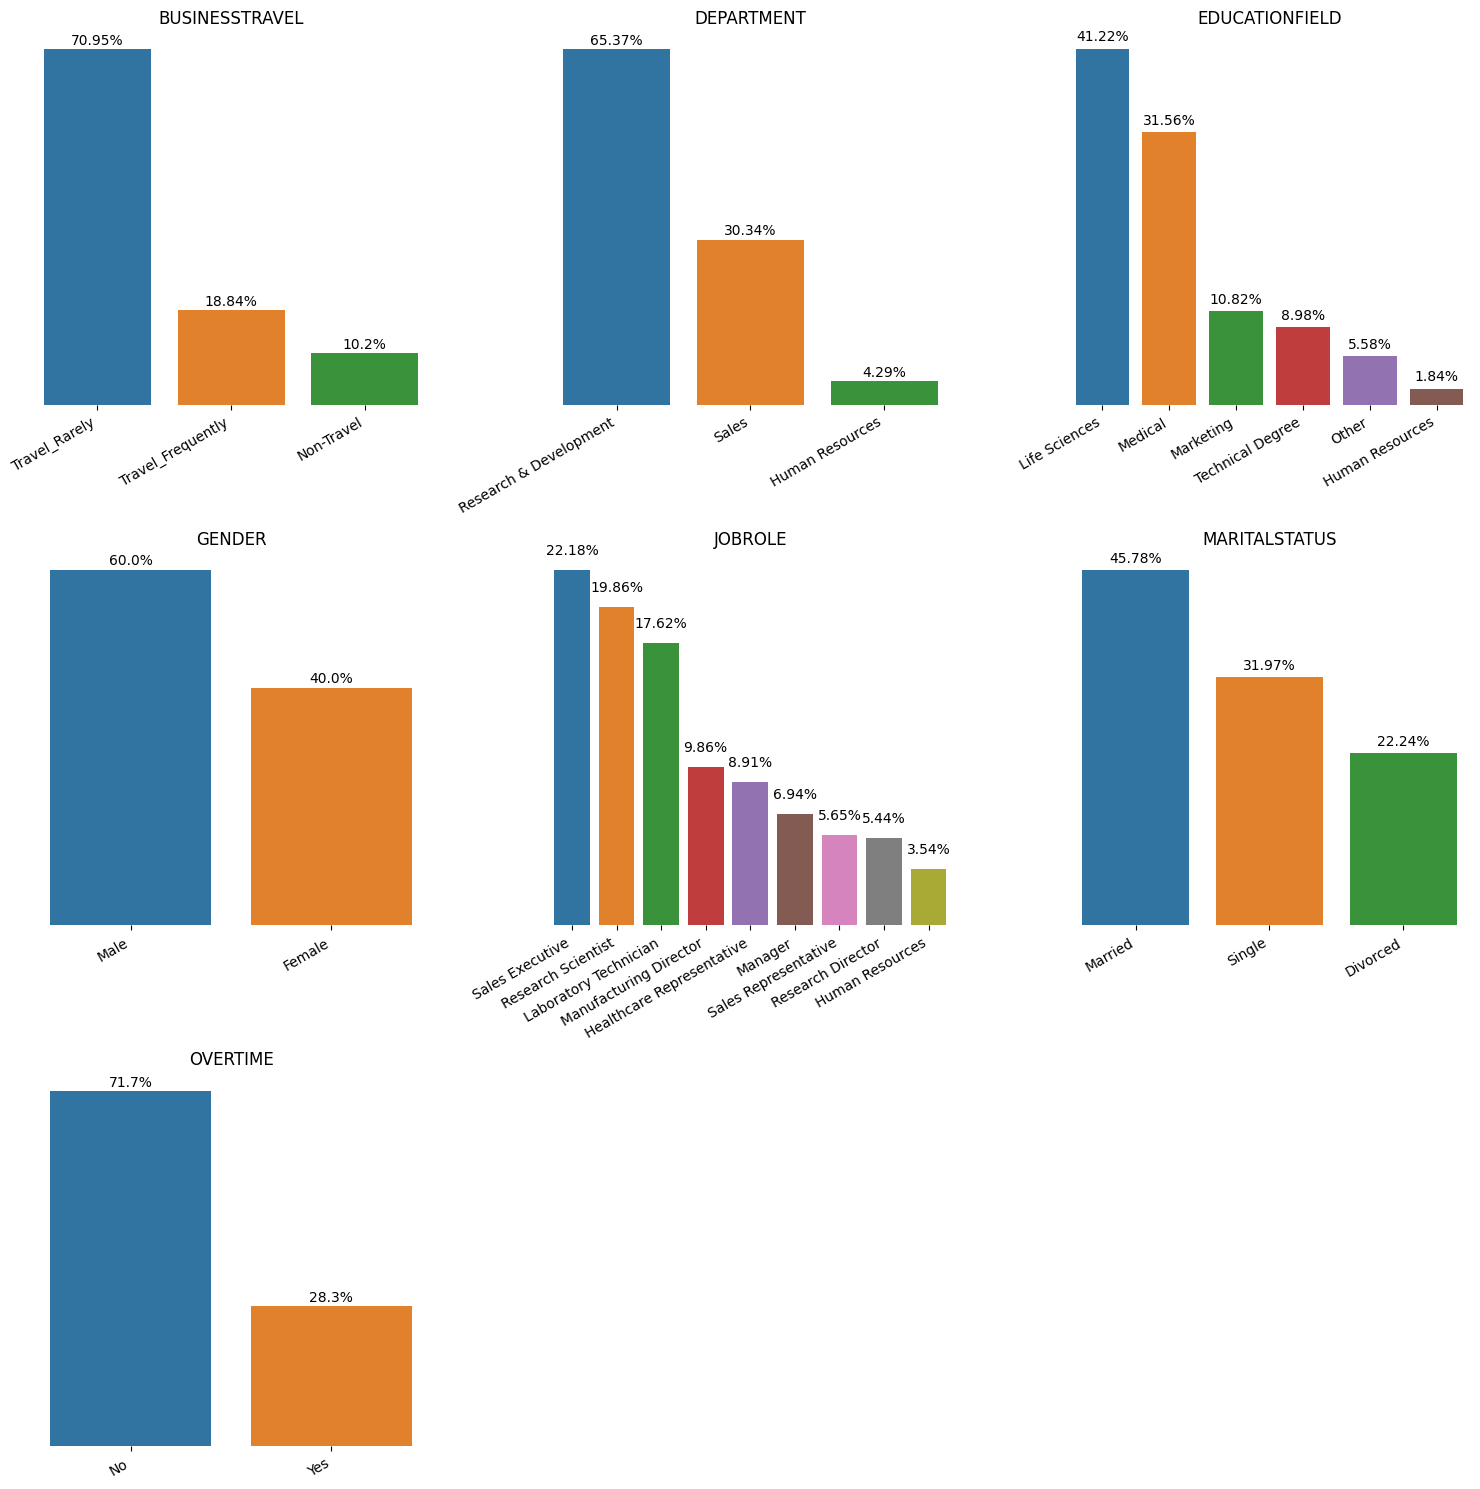

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of categorical columns
cat_cols = df.select_dtypes(include = 'object').columns.to_list()

# Determine number of rows needed for subplots
n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten the axes for easier iteration
axs = axs.flatten()

for i in range(n_rows * n_cols):
    if i < len(cat_cols):
        cat_col = cat_cols[i]
        # Compute relative frequencies
        rel_freq = df[cat_col].value_counts(normalize=True) * 100

        # Plot bar plot
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=axs[i])

        # Remove y-axis
        axs[i].get_yaxis().set_visible(False)

        # Add percentages on top of each bar
        for j, v in enumerate(rel_freq.values):
            axs[i].text(j, v + 1, str(round(v, 2)) + '%', ha = 'center')

        # Rotate and align xticks
        for tick in axs[i].get_xticklabels():
            tick.set_rotation(30)
            tick.set_horizontalalignment('right')
        
        # Set title, labels etc
        axs[i].set_title(cat_col.upper())
        axs[i].set_xlabel('')
        
        # Remove borders
        for spine in axs[i].spines.values():
            spine.set_visible(False)
    else:
        axs[i].axis('off')  # hide empty subplots

plt.tight_layout()
plt.show()

## Observation

The distributions of the various categorical fields show that the organisation could be a medical/pharma company that produces products which are sold in the market and largely comprise in-house R&D with almost 1/3rd doing overtime and 1/5 travelling frequently which are key indicators for discomfort? Are they compensated enough to be retained?

## Can we create derived fields?

In [ ]:
df.columns

Index(['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Training atleast once

In [ ]:
df['TrainingAtleastOnce'] = df['TrainingTimesLastYear']>0

df['TrainingAtleastOnce'].value_counts()

True     1416
False      54
Name: TrainingAtleastOnce, dtype: int64

### Employee Tenure

calculate the "EmployeeTenure" by subtracting the "YearsAtCompany" from the "TotalWorkingYears" to determine the length of time an employee has been working in the industry outside of the current company. This could provide insights into how experienced employees are before joining the organization.

In [ ]:
df['EmployeeTenure'] = df['TotalWorkingYears'] - df['YearsAtCompany']

df['EmployeeTenure'].sample(10)

1095     0
688      0
1072     1
601      9
252      0
715      0
968      2
78      11
1341     0
1437    15
Name: EmployeeTenure, dtype: int64

### Promotion Rate*

calculate the `PromotionRate` by dividing the `YearsSinceLastPromotion` by the `YearsAtCompany` to determine the average rate of promotions per year. This may indicate if employees who are promoted more frequently are less likely to leave the company.

In [ ]:
df['PromotionRate'] = round(df['YearsSinceLastPromotion']/(df['YearsAtCompany']+1), 4)

df[['YearsSinceLastPromotion', 'YearsAtCompany', 'PromotionRate']].sample(10)

YearsSinceLastPromotion  YearsAtCompany  PromotionRate
1453                        0               6         0.0000
1242                       12              21         0.5455
295                         4              20         0.1905
130                         1               3         0.2500
208                         0               3         0.0000
612                         7               8         0.7778
1177                        1              14         0.0667
1011                        0               5         0.0000
907                         3              22         0.1304
322                         0               7         0.0000

### Job Satisfaction and Environment Satisfaction

create an overall satisfaction variable by combining the `JobSatisfaction` and `EnvironmentSatisfaction` ratings. For example, you can add the two satisfaction ratings together or calculate an average score. This combined satisfaction variable can provide insights into the relationship between job and work environment satisfaction and turnover.

In [ ]:
df['JobAndEnvironmentSatisfactionSum'] = df['JobSatisfaction']+df['EnvironmentSatisfaction']
df['JobAndEnvironmentSatisfactionAvg'] = (df['JobSatisfaction']+df['EnvironmentSatisfaction'])/2

df[['JobSatisfaction', 'EnvironmentSatisfaction', 'JobAndEnvironmentSatisfactionSum', 'JobAndEnvironmentSatisfactionAvg']].sample(10)

JobSatisfaction  EnvironmentSatisfaction  \
1031                4                        1   
677                 2                        1   
809                 2                        4   
983                 4                        3   
1467                2                        2   
1077                1                        1   
537                 1                        4   
1104                3                        3   
458                 1                        3   
1414                3                        1   

      JobAndEnvironmentSatisfactionSum  JobAndEnvironmentSatisfactionAvg  
1031                                 5                               2.5  
677                                  3                               1.5  
809                                  6                               3.0  
983                                  7                               3.5  
1467                                 4                               2.0  
1077                                 2                               1.0  
537                                  5                               2.5  
1104                                 6                               3.0  
458                                  4                               2.0  
1414                                 4                               2.0

### Satisfaction with Relationships

create a variable that combines the `RelationshipSatisfaction` and `MaritalStatus` columns to assess the satisfaction level of employees in their personal relationships and its potential impact on turnover.

In [ ]:
# Define the mapping of numerical values to categories
category_mapping = {
    1: 'low',
    2: 'medium',
    3: 'medium',
    4: 'high'
}

# Create a new column for the categorized RelationshipSatisfaction
df['RelationshipSatisfactionCategory'] = df['RelationshipSatisfaction'].map(category_mapping)

df['RelationshipSatisfactionCategory'].value_counts()


medium    762
high      432
low       276
Name: RelationshipSatisfactionCategory, dtype: int64

In [ ]:
df['RelationshipSatisfactionStatus'] = df['MaritalStatus'] + ' - ' + df['RelationshipSatisfactionCategory']

df['RelationshipSatisfactionStatus'].value_counts()

Married - medium     341
Single - medium      235
Married - high       191
Divorced - medium    186
Single - high        152
Married - low        141
Divorced - high       89
Single - low          83
Divorced - low        52
Name: RelationshipSatisfactionStatus, dtype: int64

### Job Satisfaction Category

Group the "JobSatisfaction" ratings into categories (e.g., low, medium, high) to analyze the satisfaction level of employees in different groups

In [ ]:
# Create a new column for the categorized RelationshipSatisfaction
df['JobSatisfactionCategory'] = df['JobSatisfaction'].map(category_mapping)

df['JobSatisfactionCategory'].value_counts()

medium    722
high      459
low       289
Name: JobSatisfactionCategory, dtype: int64

### Job Involvement Category

In [ ]:
df['JobInvolvementCategory'] = df['JobInvolvement'].map(category_mapping)

df['JobInvolvementCategory'].value_counts()

medium    1243
high       144
low         83
Name: JobInvolvementCategory, dtype: int64

### Work Life Balance Category

In [ ]:
df['WorkLifeBalanceCategory'] = df['WorkLifeBalance'].map(category_mapping)

df['WorkLifeBalanceCategory'].value_counts()

medium    1237
high       153
low         80
Name: WorkLifeBalanceCategory, dtype: int64

### Career Growth Opportunities

calculate a `CareerGrowthOpportunities` score by combining the `YearsInCurrentRole` and `YearsSinceLastPromotion` columns. This score can represent the perceived growth opportunities within the organization and its influence on turnover.

A higher value in the `CareerGrowthOpportunities` score suggests a longer duration in the current role and a longer time since the last promotion. This could indicate a potential lack of career progression or opportunities for advancement within the organization. Conversely, a lower value would suggest a shorter duration in the current role and/or a more recent promotion, which may imply better career growth prospects.

In [ ]:
# Calculate the CareerGrowthOpportunities score
df['CareerGrowthOpportunities'] = df['YearsInCurrentRole'] + df['YearsSinceLastPromotion']

df[['YearsInCurrentRole', 'YearsSinceLastPromotion', 'CareerGrowthOpportunities']].sample(10)

YearsInCurrentRole  YearsSinceLastPromotion  CareerGrowthOpportunities
919                    7                        5                         12
1151                   3                        0                          3
406                    4                        0                          4
566                    4                        1                          5
1075                   2                        0                          2
60                     8                        7                         15
1214                   7                        6                         13
638                    2                        0                          2
476                    0                        0                          0
1431                  10                        5                         15

### Job Stability

calculate the `JobStability` by subtracting the `NumCompaniesWorked` from the `TotalWorkingYears` to determine how stable employees' job history has been.

Note: Since the `NumberCompaniesWorked` starts with 0, we can increment the whole attribute to account for the current company too which means a fresher has 1 instead of 0 to avoid division by 0 and merely a change in counting

In [ ]:
df['JobStability'] = round(df['TotalWorkingYears']/(df['NumCompaniesWorked']+1), 4)

df[['TotalWorkingYears', 'NumCompaniesWorked', 'JobStability']].sample(10)

TotalWorkingYears  NumCompaniesWorked  JobStability
814                  21                   1       10.5000
636                  10                   1        5.0000
981                   5                   0        5.0000
1392                 10                   1        5.0000
1224                  3                   1        1.5000
1133                  8                   5        1.3333
756                  10                   9        1.0000
308                  12                   2        4.0000
1208                 15                   1        7.5000
369                   3                   0        3.0000

### Education Field Level

combine `EducationField` and `Education` (which is an ordinal field) to create the `EducationFieldLevel` attribute which could be useful as not all levels make sense across Fields i.e., a 4 in LifeSciences may not be equal to a 4 in Sales

In [ ]:
df['EducationFieldLevel'] = df['EducationField'] + ' - ' + df['Education'].astype('str')

df['EducationFieldLevel'].value_counts()

Life Sciences - 3       233
Medical - 3             183
Life Sciences - 4       173
Life Sciences - 2       116
Medical - 4             104
Medical - 2              99
Life Sciences - 1        67
Medical - 1              63
Marketing - 3            59
Technical Degree - 3     57
Marketing - 4            52
Other - 4                33
Technical Degree - 4     31
Marketing - 2            24
Other - 3                24
Technical Degree - 2     22
Technical Degree - 1     19
Other - 2                19
Life Sciences - 5        17
Human Resources - 3      16
Medical - 5              15
Marketing - 1            14
Marketing - 5            10
Human Resources - 4       5
Other - 1                 5
Technical Degree - 5      3
Human Resources - 2       2
Human Resources - 5       2
Human Resources - 1       2
Other - 5                 1
Name: EducationFieldLevel, dtype: int64

### Over Time Hours

Can be computed using the `HourlyRate`, `OverTime`, `DailyRate`, `MonthlyRate`, `MonthlyIncome`, `JobLevel`, `StandardHours`?

The relationship between these fields seem unclear while there could be latent relationships but they may be obfuscated by trying to interpet under time, late or absence. 

Also, I assume `MonthlyRate` is their contractual rate but `MonthlyIncome` is what they received. How are they different though? We could do some analysis to figure out the coefficients through studying these subsets but it wouldn't yield a lot of value if other unknowns are at play. At first glance, the relationship seems unclear for any derived field to be created.

Perhaps, `MonthlyRate`/`MonthlyIncome` but what is it saying?

In [ ]:
pd.concat([df['HourlyRate'], df['MonthlyRate']/80], axis = 1)

HourlyRate  MonthlyRate
0             94     243.4875
1             61     311.3375
2             92      29.9500
3             56     289.4875
4             40     207.9000
...          ...          ...
1465          41     153.6250
1466          42     268.2125
1467          87      64.6750
1468          63     165.5375
1469          82     127.8500

[1470 rows x 2 columns]

In [ ]:
df[['HourlyRate', 'OverTime', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'JobLevel']].sample(10)

HourlyRate OverTime  DailyRate  MonthlyRate  MonthlyIncome  JobLevel
650           33       No        422        21782           5562         2
88            99       No        288        15830           4152         2
546           99       No       1396         2755           2642         1
832           52       No        367        17171           5731         2
978           89       No       1202        13888           6377         2
1383          66       No       1351         9238           2810         1
309           86      Yes        691        10077           4821         1
311           97       No       1249        20308           5210         3
896           96       No       1062        17198           6812         2
1228          60       No        552        20794           6430         2

### PerformanceSalaryRatio

Calculate the "PerformanceSalaryRatio" by dividing the "PercentSalaryHike" by the "PerformanceRating" to assess the relationship between salary increases and performance ratings.

In [ ]:
df['PerformanceSalaryRatio'] = df["PercentSalaryHike"]/df["PerformanceRating"]

df['PerformanceSalaryRatio'].sample(10)

340     5.333333
1382    4.333333
985     5.000000
213     5.333333
25      3.666667
53      4.333333
560     4.666667
1469    4.000000
1032    5.750000
790     5.000000
Name: PerformanceSalaryRatio, dtype: float64

# Visualization

## Frequency histogram

<ipython-input-87-58515d01b331>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


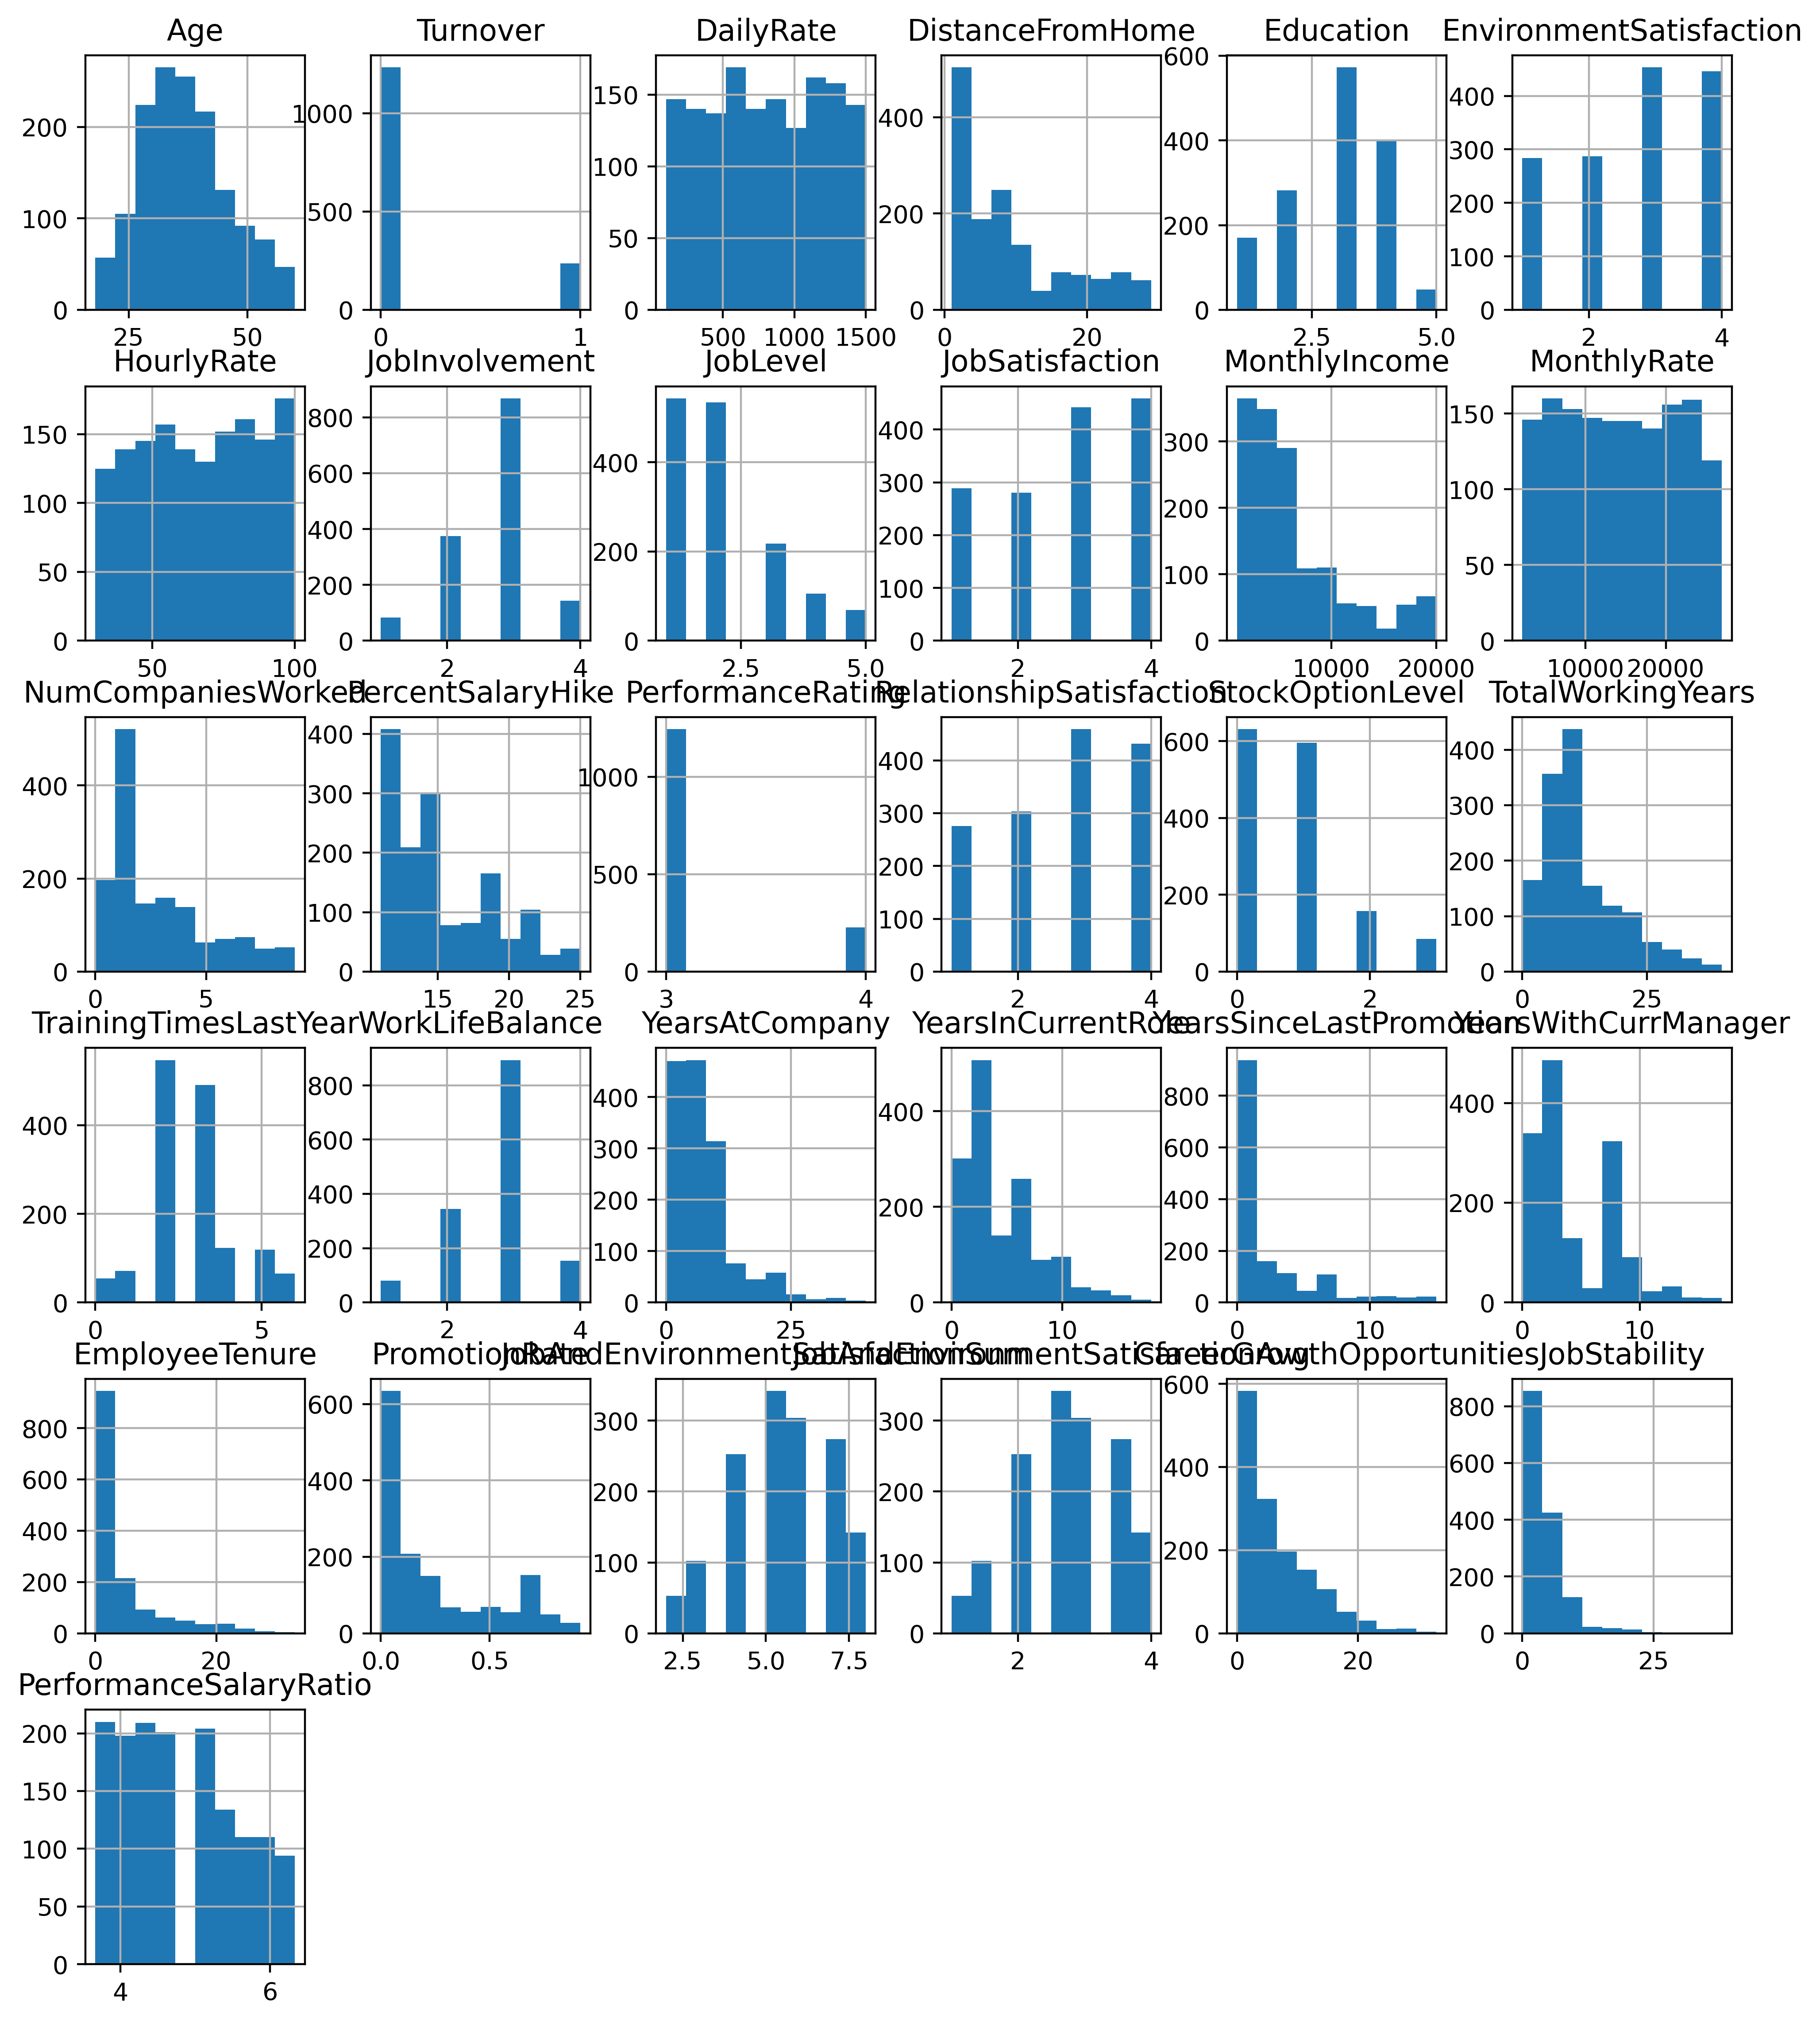

In [ ]:
fig, ax = plt.subplots(figsize = (12, 14), dpi = 400)
df.hist(ax = ax)
fig.show()

## Frequency v Turnover

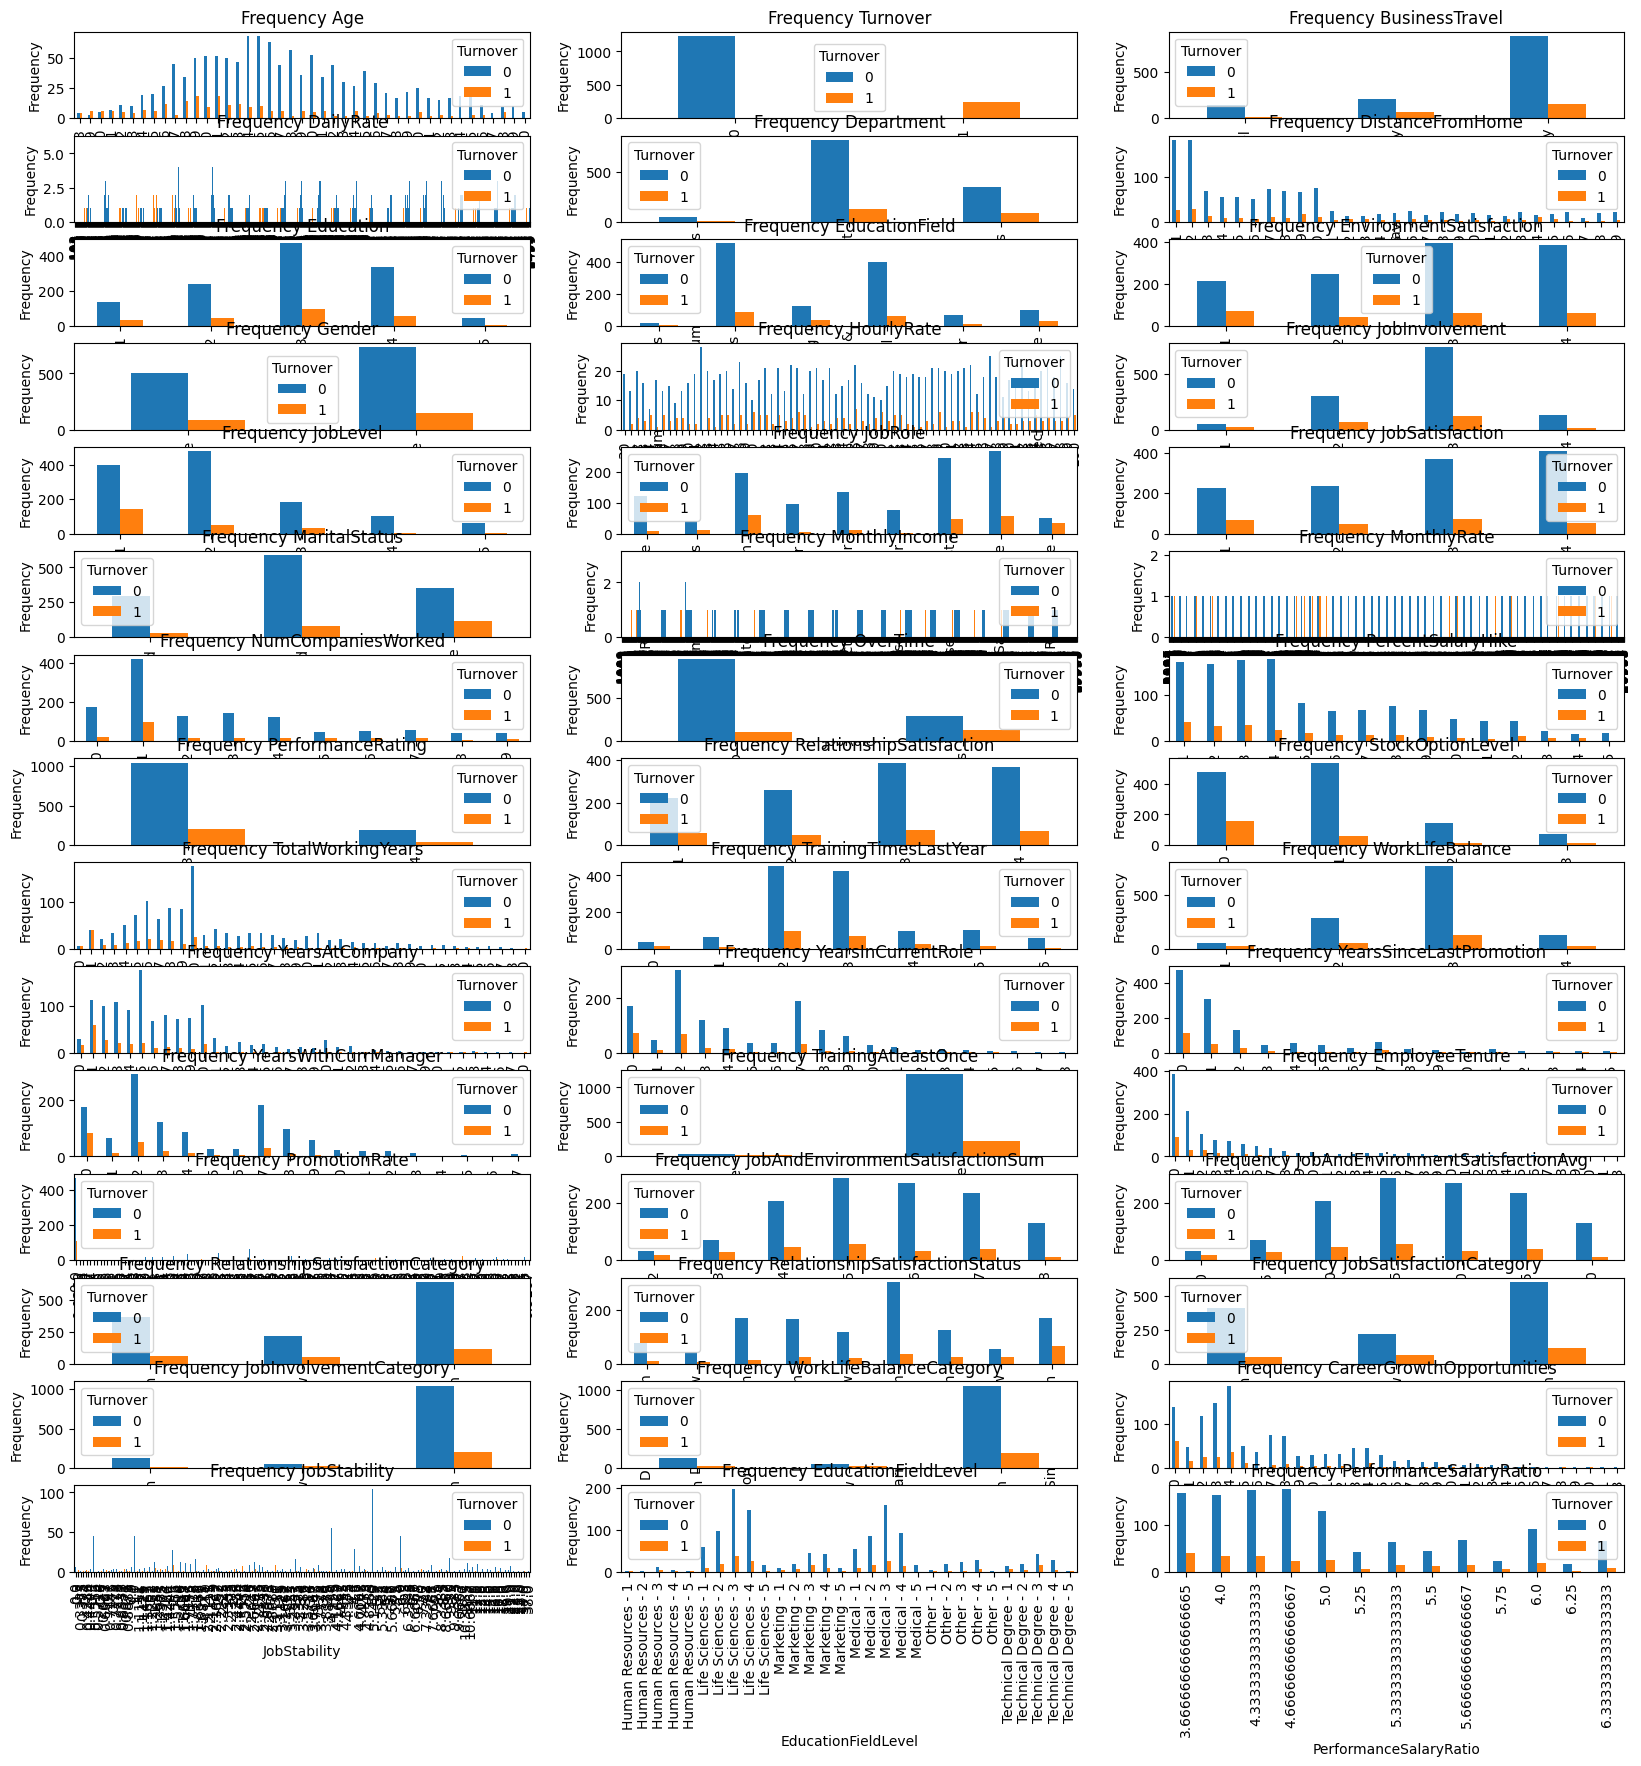

In [ ]:
rows    = 15
columns = 3
c       = 1 # Initializing plot counter

event = 'Turnover'
fig = plt.figure(figsize=(20,20))
for i in df.columns.values:
  ax = plt.subplot(rows,columns,c)
  pd.crosstab(df[i], df[event]).plot(kind='bar',ax=ax)
  plt.title('Frequency {}'.format(i))
  plt.ylabel('Frequency')
  plt.xlabel('{}'.format(i))
  #plt.tight_layout(pad=4.0)
  c = c + 1

## Correlations

<ipython-input-89-0e295ba2ace4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

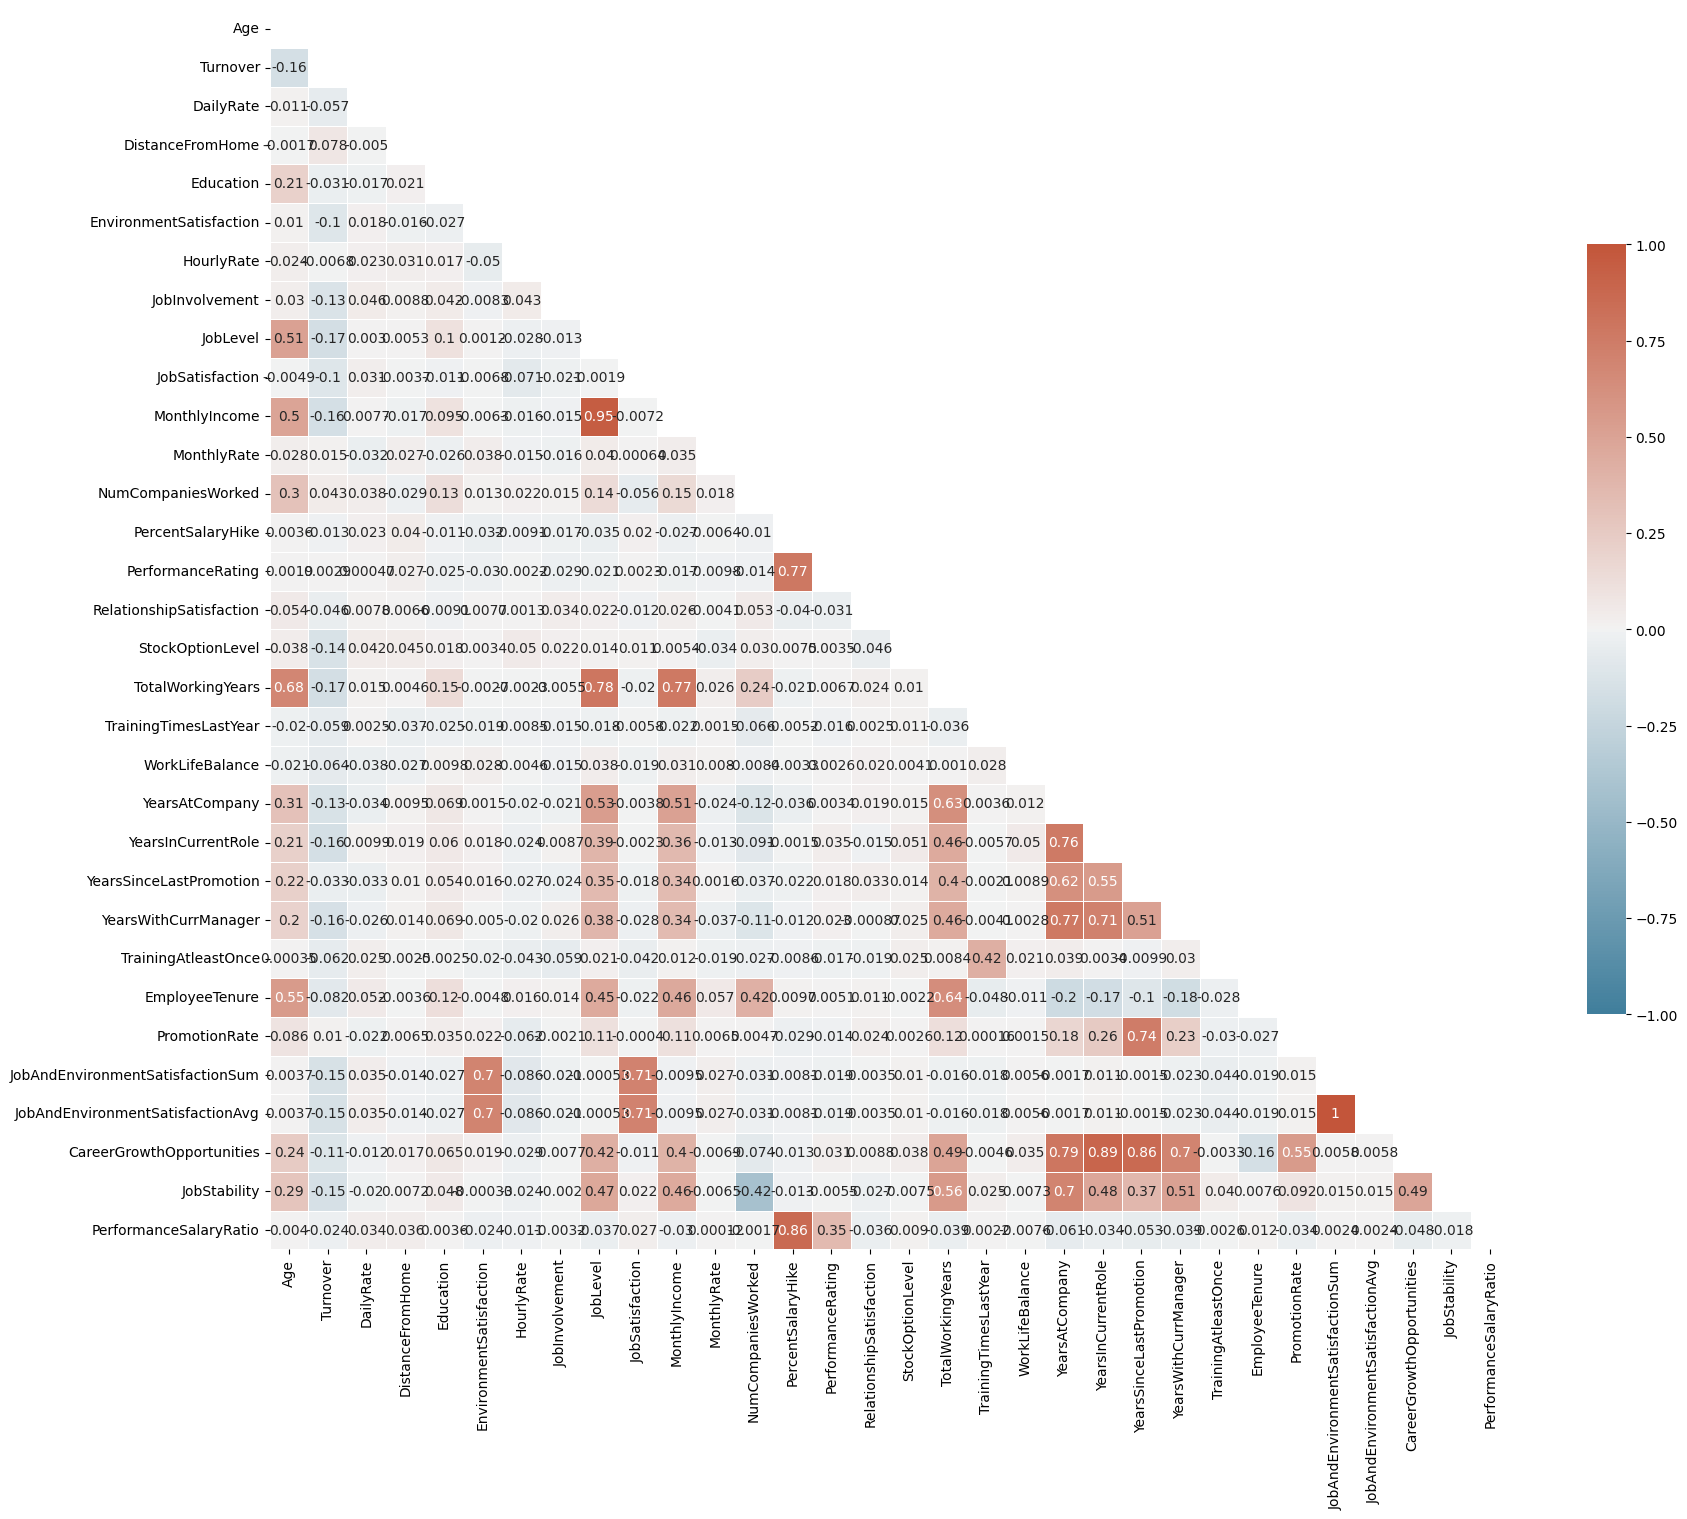

In [ ]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Observations

1. `MonthlyIncome` correlating most with `JobLevel` as expected
2. `TotalWorkingYears` correlates with `JobLevel` but not linearly it seems, perhaps differences in how different departments reward performances differently
3. `PerformanceRating` and `PercentSalaryHike` trend almost together but another candidate for scrutiny
4. 

# Data Prep

## Convert string columns to categorical

In [ ]:
for column in df.select_dtypes(include = ["object"]).columns:
    df[column] = df[column].astype("category")

In [ ]:
df.select_dtypes('category').describe()

BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole MaritalStatus OverTime  \
count              1470          1470     1470   
unique                9             3        2   
top     Sales Executive       Married       No   
freq                326           673     1054   

       RelationshipSatisfactionCategory RelationshipSatisfactionStatus  \
count                              1470                           1470   
unique                                3                              9   
top                              medium               Married - medium   
freq                                762                            341   

       JobSatisfactionCategory JobInvolvementCategory WorkLifeBalanceCategory  \
count                     1470                   1470                    1470   
unique                       3                      3                       3   
top                     medium                 medium                  medium   
freq                       722                   1243                    1237   

       EducationFieldLevel  
count                 1470  
unique                  30  
top      Life Sciences - 3  
freq                   233

# Survival Estimates

## Kaplan-Meier Survival Estimate

The Kaplan-Meier (KM) estimate is a popular statistical method used in survival analysis. It's primarily employed to estimate the survival function from lifetime data and to represent how an event of interest (like death, failure, recovery, etc.) happens over time. Here's a basic understanding of how it works:

**Conceptually:**

The KM estimate is based on the concept of survival rates. In simple terms, it estimates the probability that an event of interest has not yet occurred at a certain point in time. This 'event' could be anything that can happen to the subject of study – often it is something like death in medical research, but it could also be machine failure in engineering, or customer churn in business analytics.

**Mathematically:**

The KM estimate defines the survival function S(t), where S(t) is the probability of survival beyond time t. Suppose we have n distinct times of death t1, t2, ..., tn, each with corresponding number of deaths d1, d2, ..., dn and number at risk (those who have not yet had the event or been censored) just before each time point, n1, n2, ..., nn.

The KM estimator of the survival function is given by:

    S(t) = Π{i:ti ≤ t} (1 - di/ni)

where Π denotes the product over all i for which ti is less than or equal to t.

**Interpretation:**

The KM survival function is often depicted graphically. The graph starts at 1 (100% survival) and every time an event occurs, the survival probability drops. The size of the drop is proportional to the number of events at that time and inversely proportional to the number of individuals at risk of the event at that time. If no event is observed at a certain time, the curve remains flat (constant survival probability).

**Censoring:**

One key aspect of survival analysis and the KM estimate is the treatment of censored observations. Censoring happens when we don't have a complete view of the time to event for an observation – for instance, a patient may leave a study before it ends, or they may still be alive at the end of the study. These are considered censored observations. The KM estimate is designed to handle such censoring in a rigorous way.

Remember that the KM estimate is a purely descriptive method, and while it can provide useful information about survival rates, it cannot on its own explain why certain observations survive longer than others. To understand the impact of explanatory variables (like treatment groups, or patient characteristics), you would need to use techniques like Cox proportional hazards regression.


In [ ]:
! pip install lifelines

from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a4ab9d57591fa7db28cddcecfc95525d467b65b946107df5f44cd6377cc18e9f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


### #Years at company

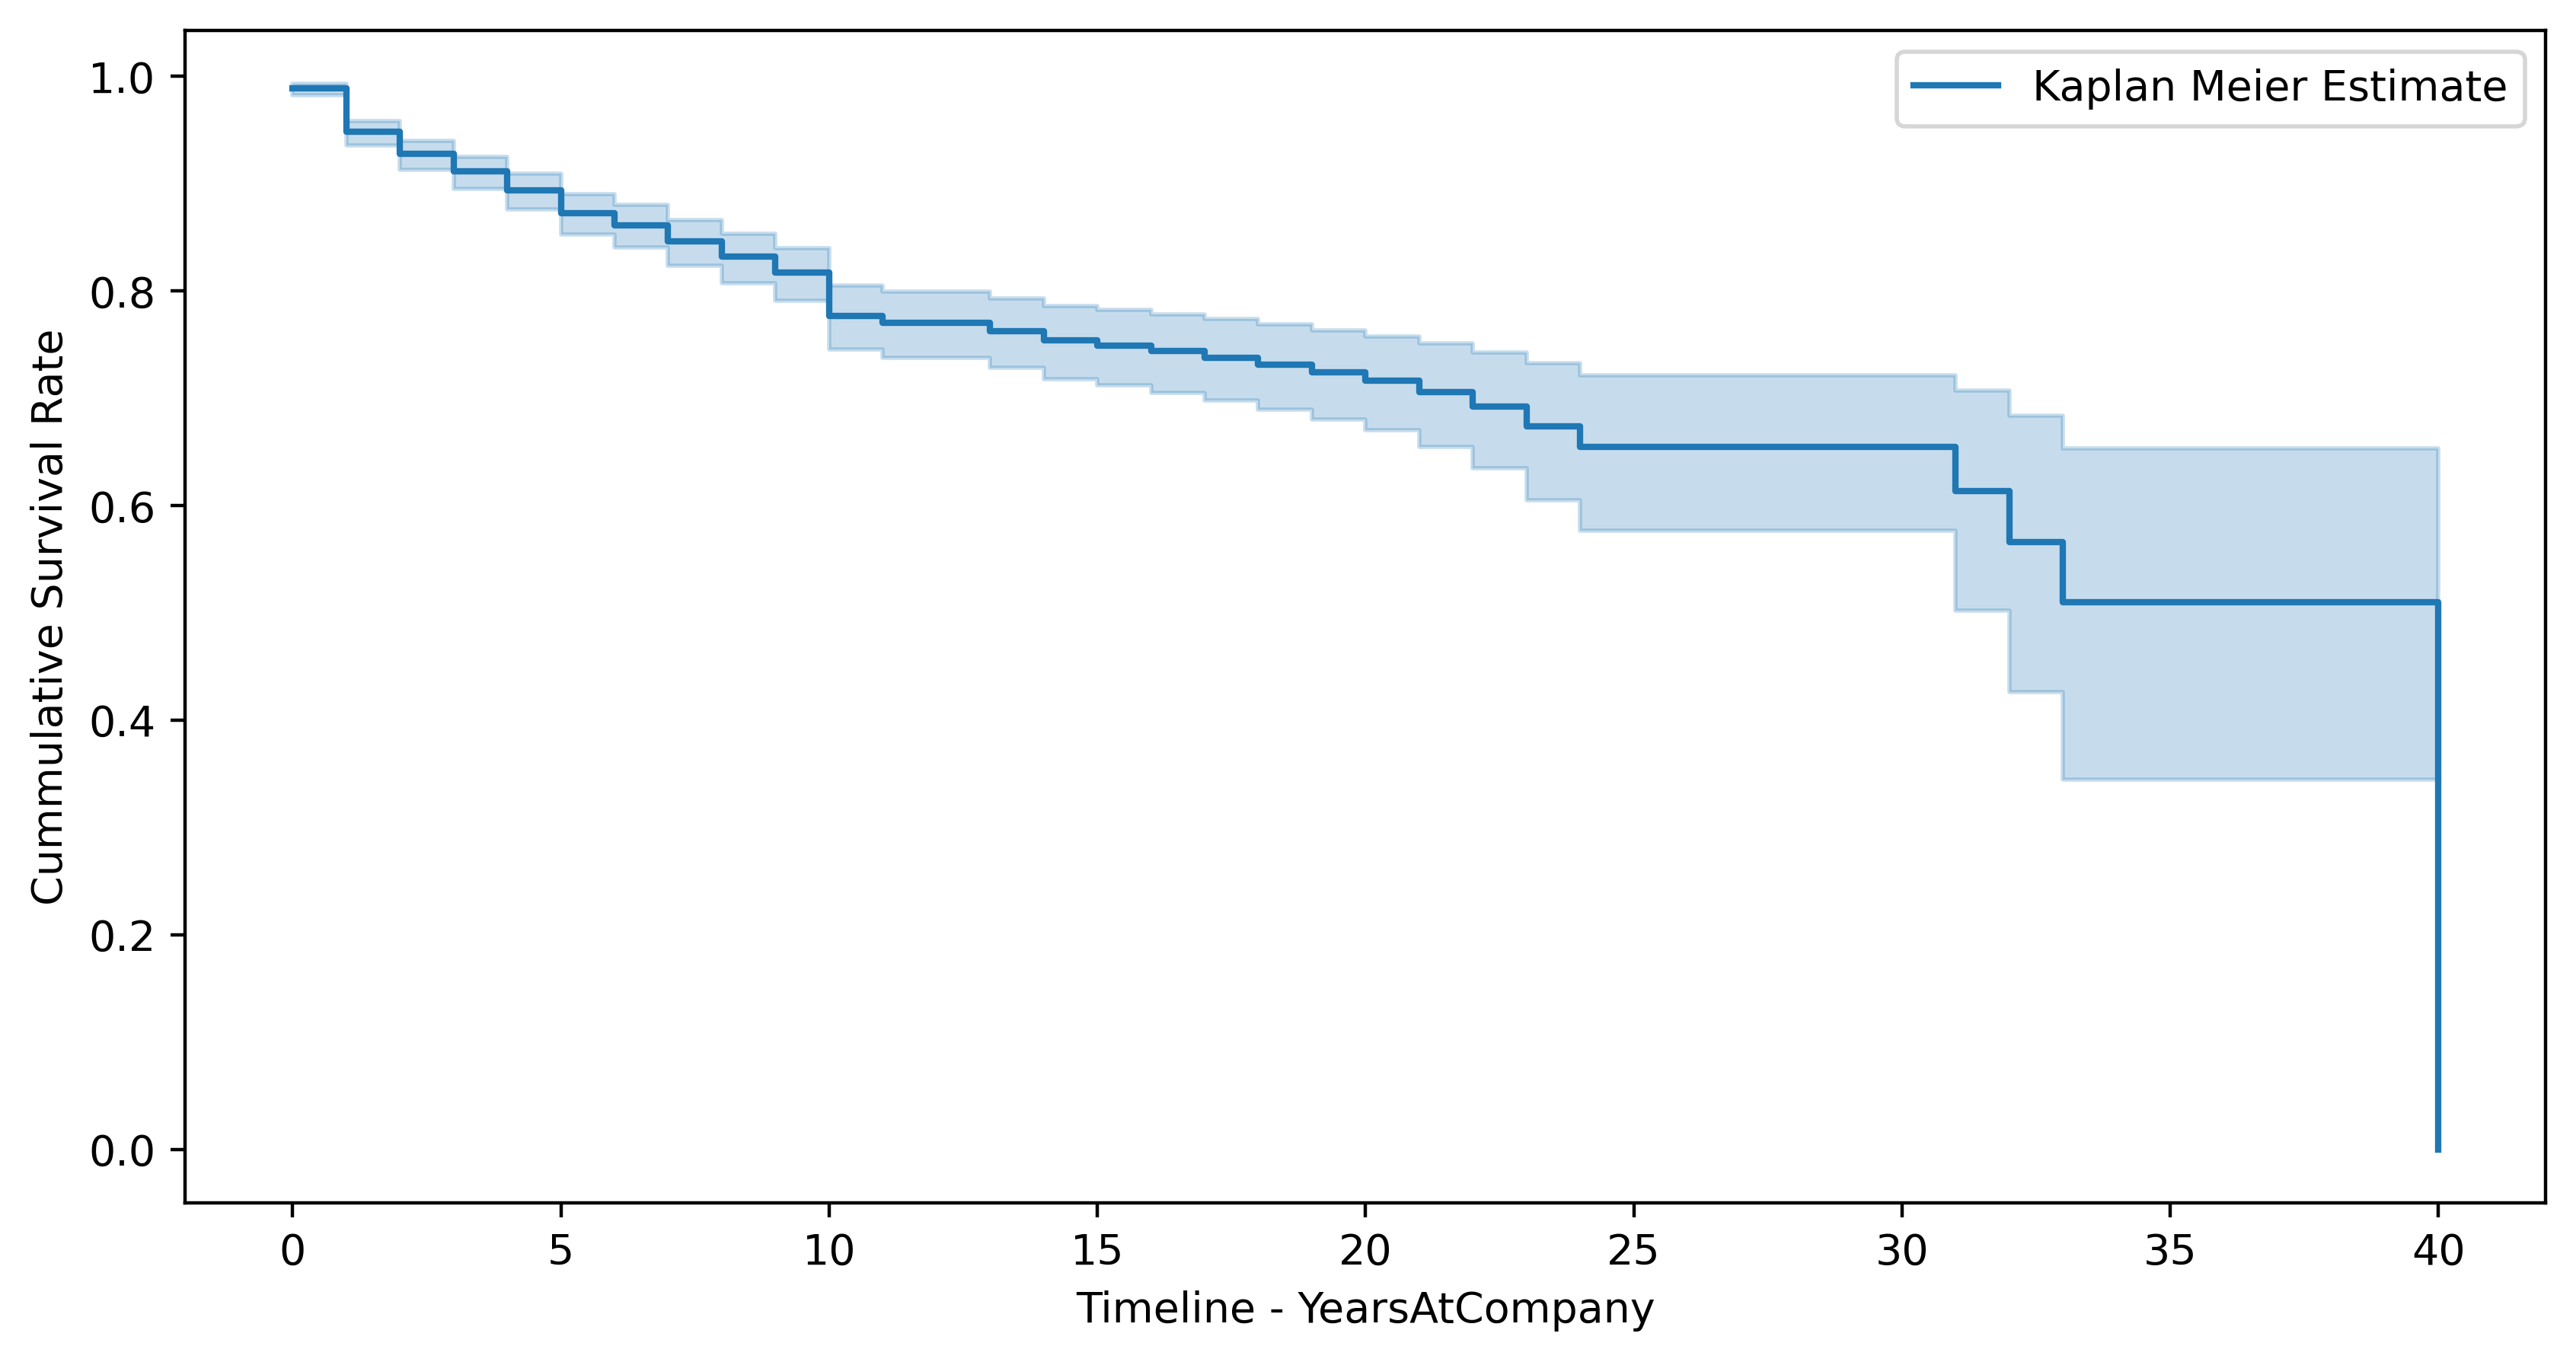

In [ ]:
kmf.fit(df["YearsAtCompany"], 
        df["Turnover"], 
        label = 'Kaplan Meier Estimate')

fig, ax = plt.subplots(figsize = (10, 5), dpi = 400)
kmf.plot_survival_function(ax = ax, ci_show = True)

ax.set_ylabel("Cummulative Survival Rate")
ax.set_xlabel("Timeline - YearsAtCompany")

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(10)

### Observation*

## Cox Regression

Cox Proportional Hazards Regression, often shortened to Cox Regression, is a method used in survival analysis for investigating the effect of several variables upon the time a specified event takes to happen. In the context of HR turnover analytics, this event would be an employee leaving the company, either voluntarily (resignation) or involitionally (termination).

Here's a breakdown of how it's used:

**Application**

In HR analytics, we might be interested in the 'survival time' of an employee in a company – how long they stay before they leave. There can be various predictors for this 'survival time' – such as age, gender, job satisfaction level, monthly income, years in the current role, etc. Cox regression allows us to understand the effect of these predictors while taking into account that not all employees might have 'experienced the event' (not all employees would have left) at the time of the analysis.

**Interpretation**

Cox regression produces Hazard Ratios for each predictor. A hazard ratio (HR) is the effect of an explanatory variable on the hazard or risk of the event. If the HR > 1, the variable is associated with higher likelihood of the event happening (here, the employee leaving). If HR < 1, the variable is associated with lower likelihood. If HR = 1, the variable doesn’t affect the likelihood of the event.

For instance, if the hazard ratio for 'JobSatisfaction' is 0.7, this means that a unit increase in job satisfaction score reduces the risk of turnover by 30%. 

**Assumptions**

Cox regression assumes that the hazard ratios are constant over time, meaning that the ratios of the hazards for any two individuals is constant over time. This is the Proportional Hazards assumption. However, it does not require a specific functional form for the baseline hazard, making it a semi-parametric method.

**Censoring**

Just as with Kaplan-Meier, Cox regression is designed to handle censoring – employees who are still with the company at the time of analysis, or who left the company for reasons other than the event of interest (e.g., retirement or death), are considered 'censored' observations.

It's important to remember that Cox regression provides associations, not causal relationships. That is, while we might find that higher job satisfaction is associated with lower turnover, this does not prove that increasing an individual employee's job satisfaction will reduce their likelihood of leaving.

Using survival analysis techniques like Kaplan-Meier and Cox regression can provide useful insights for HR and management, helping inform strategies to improve employee retention and understand the impact of various factors on employee turnover.

### Label encoding for categorical columns

In [ ]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

all_columns_dict = {}

print('Categorical columns: ')
for col in sorted(list(df.select_dtypes("category").columns)):
        
    old_values = sorted(list(df[col].unique()))
        
    print(str(col).upper())

    label = LabelEncoder()
    label = label.fit(df[col])
    df[col] = label.transform(df[col].astype(str))

    new_values = sorted(list(df[col].unique()))
    
    mini_dict = {}
    i = 0
    for item in old_values:
        mini_dict[item] = list(new_values)[i]
        print(f"\t - {item} : {list(new_values)[i]}")
        i += 1
    
    all_columns_dict[col] = mini_dict

Categorical columns: 
BUSINESSTRAVEL
	 - Non-Travel : 0
	 - Travel_Frequently : 1
	 - Travel_Rarely : 2
DEPARTMENT
	 - Human Resources : 0
	 - Research & Development : 1
	 - Sales : 2
EDUCATIONFIELD
	 - Human Resources : 0
	 - Life Sciences : 1
	 - Marketing : 2
	 - Medical : 3
	 - Other : 4
	 - Technical Degree : 5
EDUCATIONFIELDLEVEL
	 - Human Resources - 1 : 0
	 - Human Resources - 2 : 1
	 - Human Resources - 3 : 2
	 - Human Resources - 4 : 3
	 - Human Resources - 5 : 4
	 - Life Sciences - 1 : 5
	 - Life Sciences - 2 : 6
	 - Life Sciences - 3 : 7
	 - Life Sciences - 4 : 8
	 - Life Sciences - 5 : 9
	 - Marketing - 1 : 10
	 - Marketing - 2 : 11
	 - Marketing - 3 : 12
	 - Marketing - 4 : 13
	 - Marketing - 5 : 14
	 - Medical - 1 : 15
	 - Medical - 2 : 16
	 - Medical - 3 : 17
	 - Medical - 4 : 18
	 - Medical - 5 : 19
	 - Other - 1 : 20
	 - Other - 2 : 21
	 - Other - 3 : 22
	 - Other - 4 : 23
	 - Other - 5 : 24
	 - Technical Degree - 1 : 25
	 - Technical Degree - 2 : 26
	 - Technical Deg

In [ ]:
df.drop('JobAndEnvironmentSatisfactionSum', axis = 1, inplace = True)

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.0001)
cph.fit(df, duration_col = 'YearsAtCompany', event_col = 'Turnover')
cph.print_summary()

/usr/local/lib/python3.10/dist-packages/lifelines/fitters/coxph_fitter.py:1611: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Turnover'
                penalizer = 0.0001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1025.11
         time fit was run = 2023-06-06 17:31:54 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
Age                               -0.02       0.98       0.01            -0.05            -0.00                 0.96                 1.00
BusinessTravel                     0.01       1.01       0.10            -0.19             0.21                 0.83                 1.24
DailyRate                         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Department                         0.65       1.91       0.21             0.24             1.05                 1.27                 2.86
DistanceFromHome                   0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
Education                         -0.01       0.99       0.28            -0.56             0.55                 0.57                 1.72
EducationField                     0.02       1.02       1.37            -2.67             2.71                 0.07                15.03
EnvironmentSatisfaction           -0.14       0.87       1.19            -2.47             2.20                 0.08                 8.99
Gender                             0.22       1.25       0.14            -0.05             0.50                 0.95                 1.65
HourlyRate                        -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
JobInvolvement                    -0.31       0.73       0.09            -0.49            -0.14                 0.61                 0.87
JobLevel                          -0.29       0.75       0.23            -0.74             0.16                 0.48                 1.18
JobRole                           -0.07       0.93       0.04            -0.15             0.01                 0.86                 1.01
JobSatisfaction                   -0.13       0.88       1.19            -2.47             2.20                 0.08                 9.05
MaritalStatus                      0.25       1.29       2.37            -4.39             4.89                 0.01               133.59
MonthlyIncome                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
MonthlyRate                        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumCompaniesWorked                 0.11       1.11       0.04             0.03             0.18                 1.03                 1.20
OverTime                           1.31       3.71       0.14             1.04             1.58                 2.83                 4.86
PercentSalaryHike                  0.13       1.14       0.34            -0.54             0.80                 0.58                 2.22
PerformanceRating                 -0.66       0.52       1.88            -4.34             3.03                 0.01                20.60
RelationshipSatisfaction          -0.19       0.83       0.07            -0.32            -0.06                 0.72                 0.95
StockOptionLevel                  -0.15       0.86       0.12            -0.39             0.09                 0.68                 1.09
TotalWorkingYears                 -1.00       0.37       0.09            -1.18            -0.82              

### Categoric variables as predictors of employee turnout

In [ ]:
df.columns

Index(['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingAtleastOnce', 'EmployeeTenure', 'PromotionRate',
       'JobAndEnvironmentSatisfactionAvg', 'RelationshipSatisfactionCategory',
       'RelationshipSatisfactionStatus', 'JobSatisfactionCategory',
       'JobInvolvementCategory', 'WorkLifeBalanceCategory',
       'CareerGrowthOpportunities', 'JobStability', 'EducationFieldLevel',
       'PerformanceSalaryRatio'],
 

In [ ]:
all_columns_dict.keys()

dict_keys(['BusinessTravel', 'Department', 'EducationField', 'EducationFieldLevel', 'Gender', 'JobInvolvementCategory', 'JobRole', 'JobSatisfactionCategory', 'MaritalStatus', 'OverTime', 'RelationshipSatisfactionCategory', 'RelationshipSatisfactionStatus', 'WorkLifeBalanceCategory'])

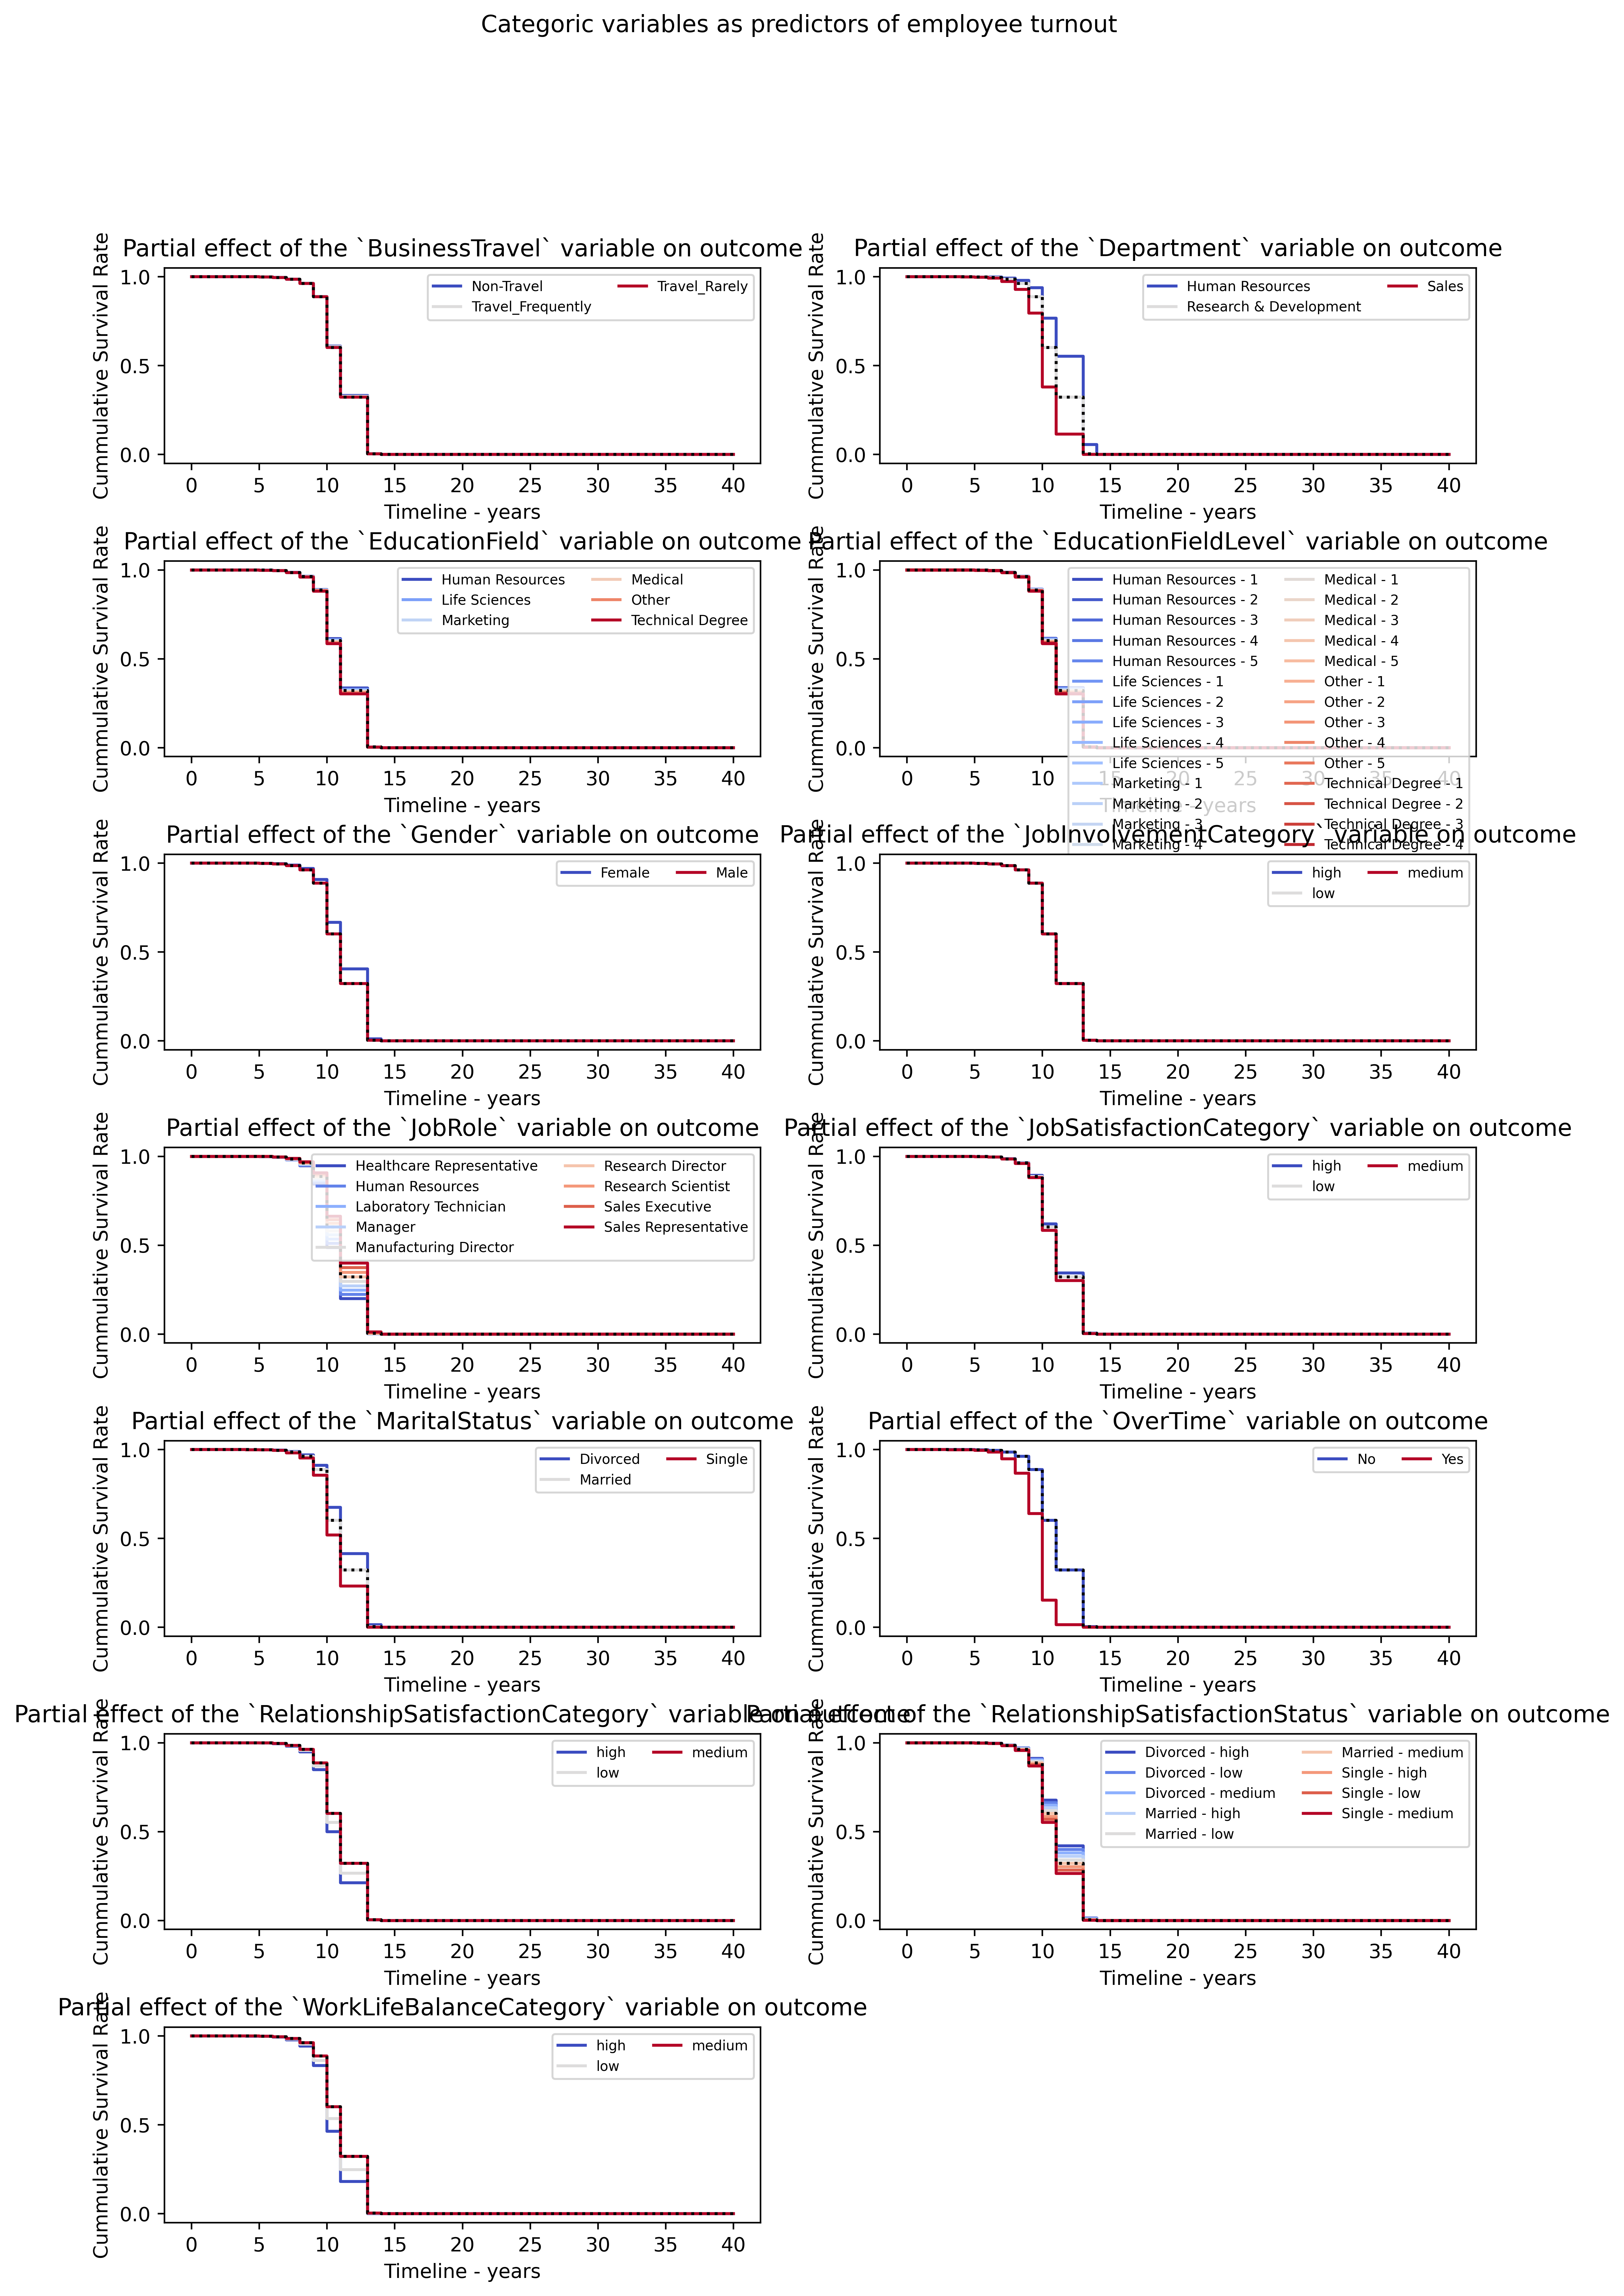

In [ ]:
plt.figure(figsize = (12, 18), dpi = 500)
plt.subplots_adjust(hspace = 0.5)
plt.suptitle("Categoric variables as predictors of employee turnout")

for column in list(all_columns_dict.keys()):
       
    ax = plt.subplot(7, 2, list(all_columns_dict.keys()).index(column) + 1)
        
    cph.plot_partial_effects_on_outcome(ax = ax, 
                                        covariates = column, 
                                        values = list(all_columns_dict[column].values()), 
                                        cmap = 'coolwarm')

    ax.set_ylabel("Cummulative Survival Rate")
    ax.set_xlabel("Timeline - years")

    ax.set_title(f"Partial effect of the `{column}` variable on outcome")

    ax.legend(all_columns_dict[column].keys(), ncol = 2, prop={'size': 7})

## Observation

1. Employees who do `Overtime` 
2. Employees in the department `Sales`

Are more susceptible for Turnover it looks like.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Feature Importance & Selection

In [ ]:
df.sample(10)

Age  Turnover  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1260   32         0               0        953           1                 5   
1      49         0               1        279           1                 8   
513    20         1               2       1362           1                10   
716    41         0               1        840           1                 9   
878    42         0               0        179           0                 2   
647    35         0               2        672           1                25   
365    46         0               0       1144           1                 7   
1096   40         0               2        898           0                 6   
1122   29         0               2       1370           1                 3   
620    35         0               2       1343           1                27   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
1260          4               5                        2       1  ...   
1             1               1                        3       1  ...   
513           1               3                        4       1  ...   
716           3               3                        1       1  ...   
878           5               3                        4       1  ...   
647           3               5                        4       1  ...   
365           4               3                        3       0  ...   
1096          2               3                        3       1  ...   
1122          1               3                        2       1  ...   
620           1               3                        3       0  ...   

      JobAndEnvironmentSatisfactionAvg  RelationshipSatisfactionCategory  \
1260                               2.0                                 2   
1                                  2.5                                 0   
513                                3.5                                 0   
716                                2.0                                 2   
878                                2.5                                 1   
647                                3.0                                 1   
365                                3.0                                 2   
1096                               3.5                                 0   
1122                               1.5                                 0   
620                                2.0                                 0   

      RelationshipSatisfactionStatus  JobSatisfactionCategory  \
1260                               8                        2   
1                                  3                        2   
513                                6                        2   
716                                2                        2   
878                                4                        1   
647                                4                        2   
365                                5                        2   
1096                               6                        0   
1122                               6                        1   
620                                6                        1   

      JobInvolvementCategory  WorkLifeBalanceCategory  \
1260                       2                        2   
1                          2                        2   
513                        2                        2   
716                        2                        0   
878                        0                        0   
647                        2                        2   
365                        2                        0   
1096                       2                        2   
1122                       2                        2   
620                        2                        2   

      CareerGrowthOpportunities  JobStability  EducationFieldLevel  \
1260                          7        4.0000                   28   


In [ ]:
# Identificamos las variables categoricas

df_categories = df.select_dtypes(include=['category']).copy() # La guardamos como variable para su posterior uso.
print(df_categories.columns.values,'\n')

[] 



In [ ]:
for i in df_categories.columns.values:
    categories_list = 'var'+' '+ i
    categories_list = pd.get_dummies(df[i],prefix = i)
    df_1 = df.join(categories_list)
    df = df_1

In [ ]:
df = df.drop(df_categories, axis=1)

df.columns

Index(['Age', 'Turnover', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingAtleastOnce', 'EmployeeTenure', 'PromotionRate',
       'JobAndEnvironmentSatisfactionAvg', 'RelationshipSatisfactionCategory',
       'RelationshipSatisfactionStatus', 'JobSatisfactionCategory',
       'JobInvolvementCategory', 'WorkLifeBalanceCategory',
       'CareerGrowthOpportunities', 'JobStability', 'EducationFieldLevel',
       'PerformanceSalaryRatio'],
 

In [ ]:
df_X = df.drop('Turnover', axis=1)
X = df_X.values
Y = df['Turnover'].values 

In [ ]:
scaler = preprocessing.StandardScaler()
X2 = scaler.fit_transform(X) 

In [ ]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator= rfc, step= 1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X2,Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='accuracy')

Number of optimal features: 26


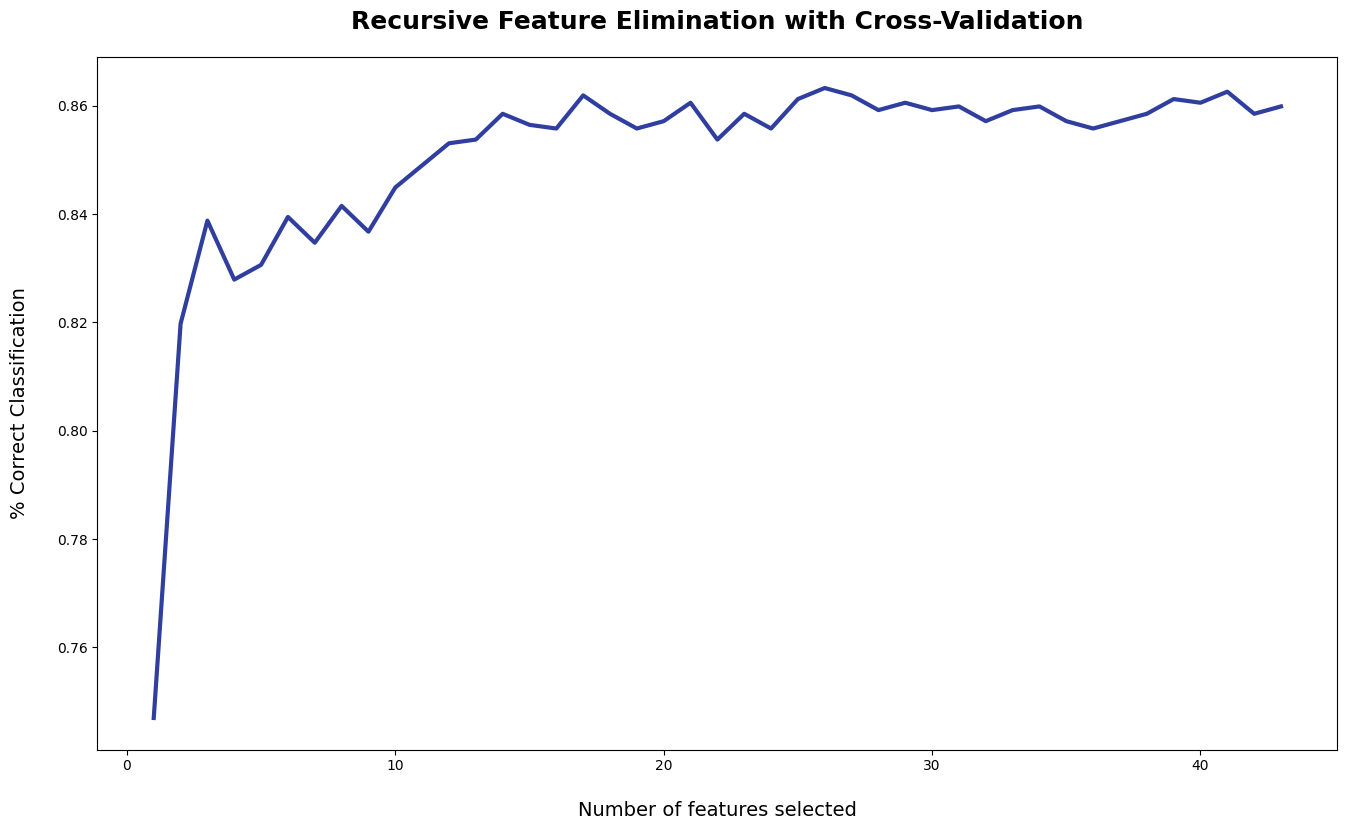

In [ ]:
print('Number of optimal features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)

plt.show()

In [ ]:
df_X.drop(df_X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

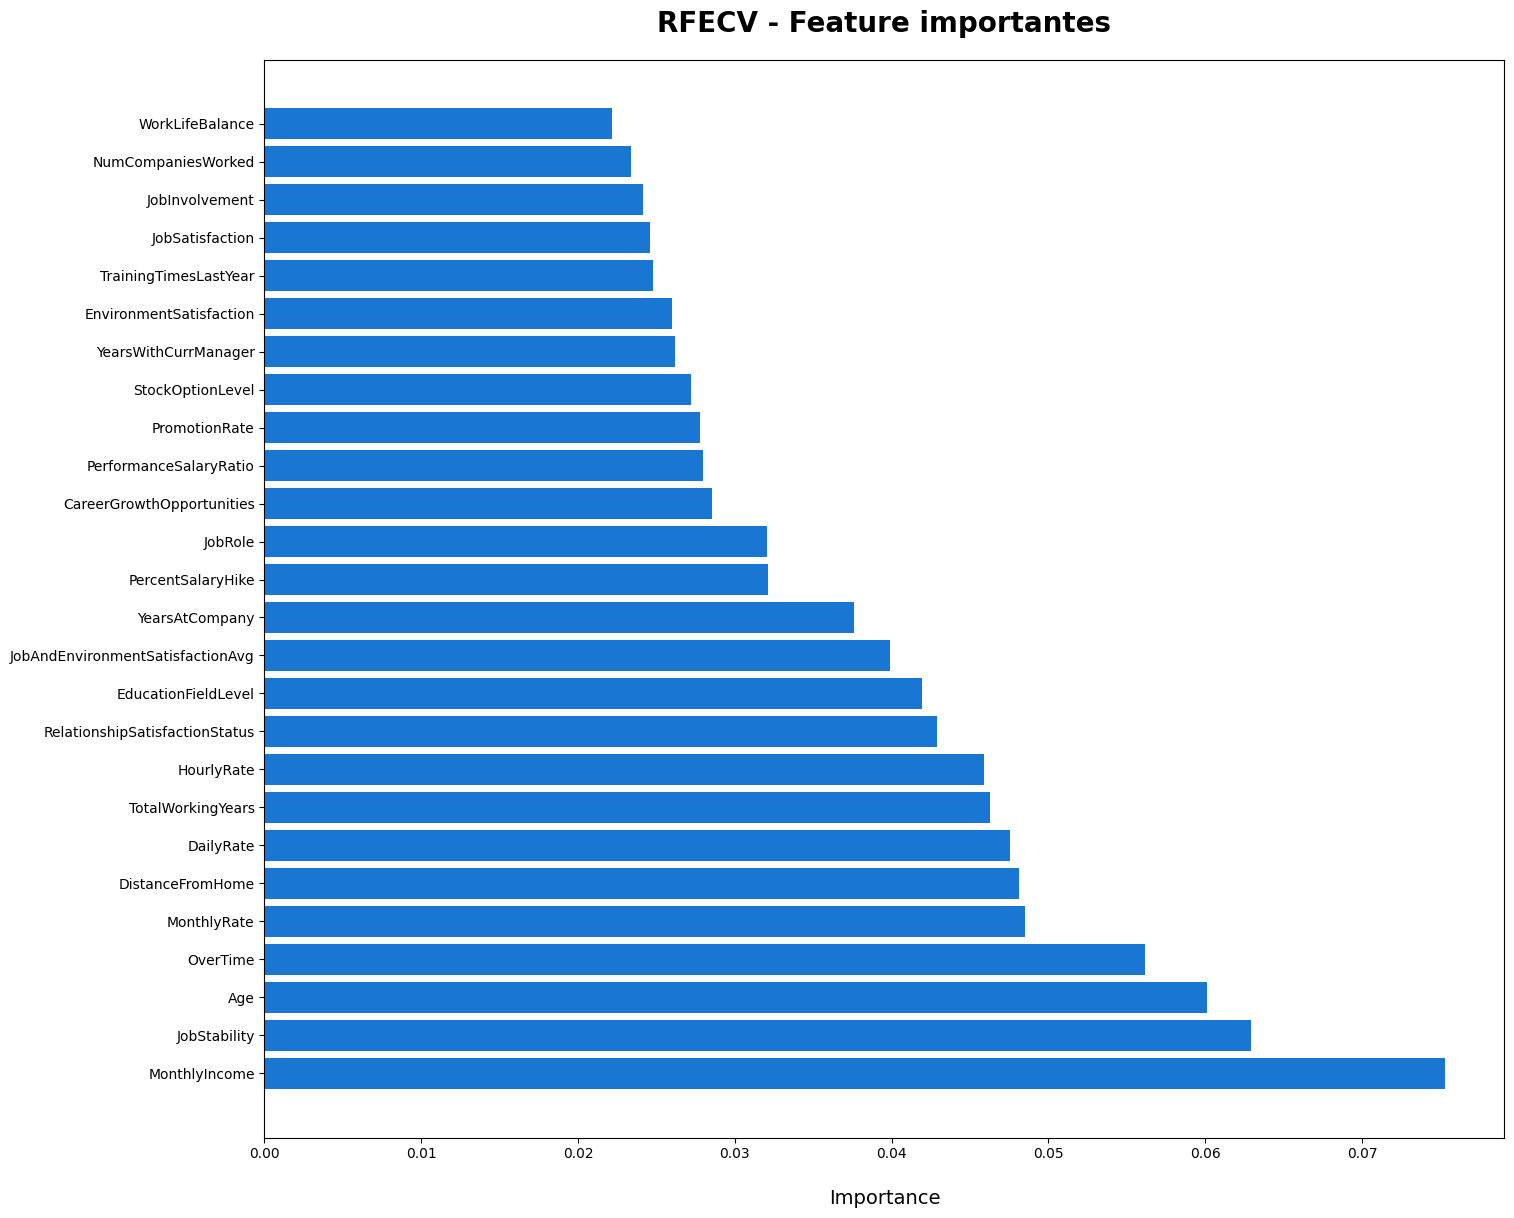

In [ ]:
dset = pd.DataFrame()
dset['attr'] = df_X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importantes', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
test_size = 0.3
random_state = 42

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size= test_size, random_state= random_state)

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (1029, 43)
Training Labels Shape: (1029,)
Testing Features Shape: (441, 43)
Testing Labels Shape: (441,)


# Model Building

### Logistic Regression

In [ ]:
model_lr = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_lr.fit(X_train, Y_train)

print('Precision Random Forest: {:.3f}'.format(accuracy_score(Y_test, model_lr.predict(X_test))))
print(classification_report(Y_test, model_lr.predict(X_test)))


Precision Random Forest: 0.878
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.62      0.30      0.40        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.67       441
weighted avg       0.86      0.88      0.86       441



### Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 100, random_state=10, max_depth=13)
model_rf.fit(X_train,Y_train)

print('Precision Random Forest: {:.3f}'.format(accuracy_score(Y_test, model_rf.predict(X_test))))
print(classification_report(Y_test, model_rf.predict(X_test)))

Precision Random Forest: 0.864
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       380
           1       0.54      0.11      0.19        61

    accuracy                           0.86       441
   macro avg       0.71      0.55      0.56       441
weighted avg       0.83      0.86      0.82       441



### SVM

In [ ]:
model_svc = SVC(C=1, probability=True)
model_svc.fit(X_train,Y_train)

print('Precision Support vector machine: {:.3f}'.format(accuracy_score(Y_test, model_svc.predict(X_test))))
print(classification_report(Y_test, model_svc.predict(X_test)))

Precision Support vector machine: 0.873
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       380
           1       1.00      0.08      0.15        61

    accuracy                           0.87       441
   macro avg       0.94      0.54      0.54       441
weighted avg       0.89      0.87      0.82       441



After calculating the precision of the models, Cross Validation is used to generalize the model and confirm that it is well adapted.

In [ ]:
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("Average precision 10-fold cross validation: %.3f" % (results.mean()))

Average precision 10-fold cross validation: 0.859


## ROC Curve

This curve shows the rate of true positives versus false positives for different classification thresholds.

<Figure size 640x480 with 0 Axes>

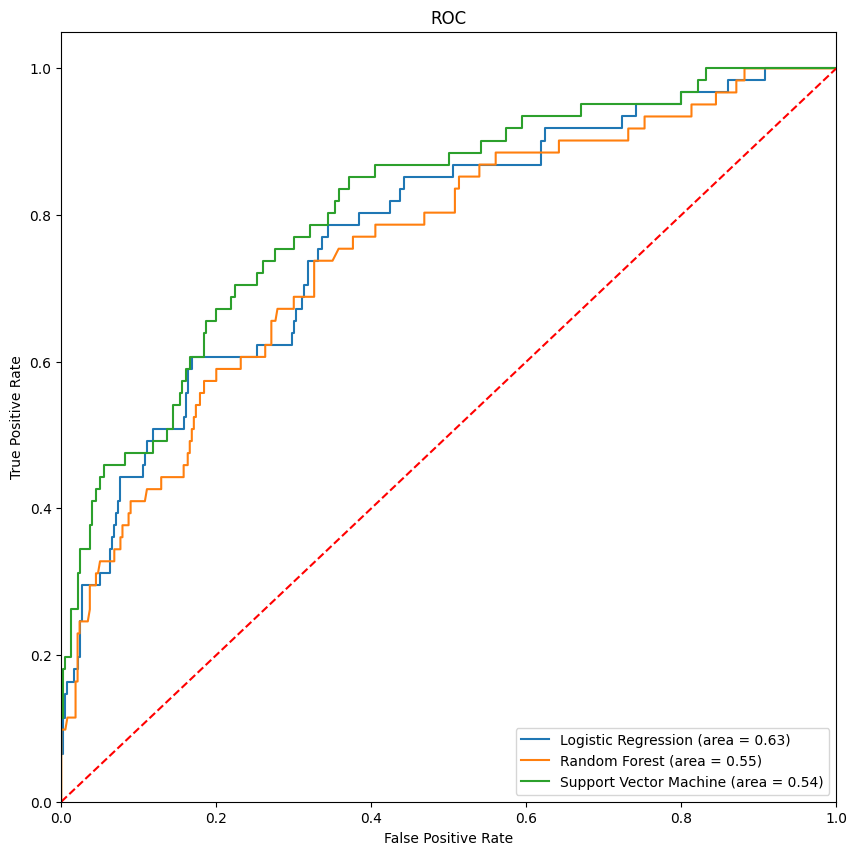

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, model_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(Y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, model_rf.predict_proba(X_test)[:,1])

svc_roc_auc = roc_auc_score(Y_test, model_svc.predict(X_test))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(Y_test, model_svc.predict_proba(X_test)[:,1])

plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')

The recent graph shows two prediction models, which are far from the red curve (represents a pure random curve). The further away from this, the greater precision and recall the model will present.

# Sampling

Address class imbalance through over sampling minority class or undersampling majority class through various approaches such as SMOTE, Borderline-SMOTE and Adaptive Synthetic Sampling (ADASYN) to oversample and Random Under Sampler to under sample

## Note

SMOTE, Borderline SMOTE, ADASYN, and Random Under-Sampler are techniques commonly used to address class imbalance in machine learning.

1. SMOTE (Synthetic Minority Over-sampling Technique): SMOTE is an oversampling technique that aims to balance the class distribution by generating synthetic samples for the minority class. It works by selecting a sample from the minority class, identifying its nearest neighbors, and creating new synthetic samples along the line segments between the chosen sample and its neighbors. This helps to increase the representation of the minority class in the dataset.

2. Borderline SMOTE: Borderline SMOTE is a variant of SMOTE that focuses on the borderline instances of the minority class. It identifies samples that are near the decision boundary between the minority and majority classes and selectively generates synthetic samples for those instances. This approach aims to provide better generalization by focusing on the potentially more ambiguous instances.

3. ADASYN (Adaptive Synthetic Sampling): ADASYN is another variant of SMOTE that adapts the sampling rate based on the data distribution. It assigns a higher sampling rate to instances with fewer synthetic examples and a lower sampling rate to instances with more synthetic examples. This adaptive nature allows ADASYN to generate synthetic samples in a more balanced and data-driven manner.

4. Random Under-Sampler: Random Under-Sampler is an undersampling technique that reduces the number of instances in the majority class to balance the class distribution. It randomly selects instances from the majority class to match the number of instances in the minority class. This technique can help address class imbalance by removing some of the majority class instances but may result in information loss due to the removal of data.

These techniques aim to mitigate the impact of class imbalance in machine learning models. SMOTE, Borderline SMOTE, and ADASYN focus on oversampling the minority class to create synthetic samples, whereas Random Under-Sampler performs undersampling of the majority class. The choice of which technique to use depends on the specific characteristics of the dataset and the problem at hand. It's recommended to experiment with different techniques and evaluate their performance to determine the most suitable approach for your specific case.

Reference

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, Y_train)

# Predict using the model
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.75      0.30      0.42        61

    accuracy                           0.89       441
   macro avg       0.82      0.64      0.68       441
weighted avg       0.88      0.89      0.87       441



### SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Perform SMOTE on the training data
smote = SMOTE(sampling_strategy='minority')
X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)

# Then scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)  # Note use of transform, not fit_transform

In [ ]:
# Fit the model
xgb_model.fit(X_train_scaled, Y_train_sm)

# Predict using the model
Y_pred = xgb_model.predict(X_test_scaled)

# Print the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       380
           1       0.58      0.30      0.39        61

    accuracy                           0.87       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.85      0.87      0.85       441



### Borderline SMOTE

In [ ]:

# Option 2: Borderline-SMOTE (oversampling variant that focuses on borderline instances)
borderline_smote = BorderlineSMOTE(sampling_strategy='minority', random_state=42)
X_train_bs, Y_train_bs = borderline_smote.fit_resample(X_train, Y_train)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bs)
X_test_scaled = scaler.transform(X_test)

# Train a model (e.g., Logistic Regression) on each set of balanced data
model = LogisticRegression()
model.fit(X_train_scaled, Y_train_bs)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       380
           1       0.34      0.56      0.42        61

    accuracy                           0.79       441
   macro avg       0.63      0.69      0.64       441
weighted avg       0.84      0.79      0.81       441



### ADASYN

In [ ]:
# Option 3: ADASYN (oversampling variant that adapts the sampling rate based on the data distribution)
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train_ada, Y_train_ada = adasyn.fit_resample(X_train, Y_train)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ada)
X_test_scaled = scaler.transform(X_test)

# Train a model (e.g., Logistic Regression) on each set of balanced data
model = LogisticRegression()
model.fit(X_train_scaled, Y_train_ada)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.92      0.76      0.83       380
           1       0.28      0.57      0.37        61

    accuracy                           0.73       441
   macro avg       0.60      0.67      0.60       441
weighted avg       0.83      0.73      0.77       441



### Random UnderSampler

In [ ]:
# Apply undersampling with RandomUnderSampler for comparison

# Option 4: Random Under-Sampling
rus = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

# Train a model (e.g., Logistic Regression) on each set of balanced data
model = LogisticRegression()
model.fit(X_train_scaled, Y_train_rus)

# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.92      0.72      0.81       380
           1       0.26      0.61      0.36        61

    accuracy                           0.71       441
   macro avg       0.59      0.66      0.59       441
weighted avg       0.83      0.71      0.75       441



## Observation

As it is evident the undersampling of the majority class produces best recall which means the model predicts `Turnover` 61 % of the times correctly. Which is quite a significant improvement

`MonthlyIncome`, `JobStability`, `OverTime` are the major predictors for `Turnover`

1. Revising `MonthlyIncome` for at risk employees
2. Employees with low `JobStability` would be resistant to any changes and could be waste of resources to try and retain
3. Employees doing `OverTime` 